## 1. 필요 Library 설치

In [1]:
!pip install beautifulsoup4

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [108]:
!pip install pillow

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [110]:
!pip install wordcloud

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## 2. 실행 코드

### (1) 라이브러리 불러오기

In [8]:
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from PIL import Image

import pandas as pd
import numpy as np
import random
import requests
import re

import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns

### (2) 네이버 종목 토론방 긁어오기

In [28]:
def stock_discussion_room(stock_code, pages):
    
    opinion_date_total = []
    opinion_total = []
    chanti = []
    anti = []
    
    r = re.compile(r'\d{4}.\d{2}.\d{2}')
    
    for i in range(pages) :
        
        url = 'https://finance.naver.com/item/board.nhn?code=' + stock_code + '&page=' + str(i+1)
        response = requests.get(url)
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')
        opinion = soup.select('.title')
        opinion_date = []
        
        for date in soup.find_all('span') : 
            match = r.search(date.text)
            
            if match != None :
                opinion_date.append(match.group())

        opinion_date = opinion_date[-20:]
        
        for value in opinion_date : 
            opinion_date_total.append(value)
        
        for i in range(20) :    
            opinion_total.append(opinion[i].find('a')['title'])
           
        for i, finger in enumerate(soup.find_all('strong')) :
            
            if i in np.arange(2,42, step = 2) :     
                chanti.append(finger.text)

            elif i in np.arange(3,42, step = 2) :
                anti.append(finger.text)
    
    return opinion_date_total, opinion_total, chanti, anti

## 종목코드
 - 삼성전자 : 005930
 - 셀트리온 : 068270
 - 에이치엘비 : 028300
 - 젬백스 : 082270
 - 메드팩토 : 235980
 - 플리토 : 300080
 - 화신테크 : 086250

In [29]:
opinion_date_total, opinion_total, chanti, anti = stock_discussion_room('068270', 500)

In [30]:
df = pd.DataFrame({'날짜' : opinion_date_total, '토론제목' : opinion_total, '찬성' : chanti, '반대' : anti})

In [31]:
df['날짜'].unique()

array(['2019.12.31', '2019.12.30', '2019.12.29', '2019.12.28',
       '2019.12.27', '2019.12.26', '2019.12.25', '2019.12.24',
       '2019.12.23', '2019.12.22', '2019.12.21', '2019.12.20',
       '2019.12.19', '2019.12.18', '2019.12.17', '2019.12.16',
       '2019.12.15', '2019.12.14', '2019.12.13', '2019.12.12',
       '2019.12.11', '2019.12.10', '2019.12.09', '2019.12.08',
       '2019.12.07', '2019.12.06', '2019.12.05', '2019.12.04',
       '2019.12.03', '2019.12.02', '2019.12.01', '2019.11.30',
       '2019.11.29', '2019.11.28', '2019.11.27', '2019.11.26',
       '2019.11.25', '2019.11.24', '2019.11.23', '2019.11.22',
       '2019.11.21', '2019.11.20', '2019.11.19', '2019.11.18',
       '2019.11.17', '2019.11.16', '2019.11.15', '2019.11.14',
       '2019.11.13'], dtype=object)

In [32]:
df.head()

,날짜,토론제목,찬성,반대
0,2019.12.31,양금택 아저씨 뭐하세요 ? 술 빠나요 ?,0,0
1,2019.12.31,blue**** 셀트리온 주주가...,6,0
2,2019.12.31,심플한 셀트리온 영업현황,6,1
3,2019.12.31,대박)이낙연이 삼촌 조카로 부르는사이 뉴스나옴!,0,1
4,2019.12.31,이게 팩트다! 헝가리 법인 매출은 ~,1,2


### (3) 인간지표 구하기

In [36]:
df['인간지표'] = np.nan
for i in range(df.shape[0]) :
    if int(df['찬성'][i]) == int(df['반대'][i]) :
        df['인간지표'][i] = '중립'
    elif int(df['찬성'][i]) > int(df['반대'][i]) :
        df['인간지표'][i] = '찬티'
    elif int(df['찬성'][i]) < int(df['반대'][i]) :
        df['인간지표'][i] = '안티'
df

C:\Users\woong\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\woong\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,날짜,토론제목,찬성,반대,인간지표
0,2019.12.31,양금택 아저씨 뭐하세요 ? 술 빠나요 ?,0,0,중립
1,2019.12.31,blue**** 셀트리온 주주가...,6,0,찬티
2,2019.12.31,심플한 셀트리온 영업현황,6,1,찬티
3,2019.12.31,대박)이낙연이 삼촌 조카로 부르는사이 뉴스나옴!,0,1,안티
4,2019.12.31,이게 팩트다! 헝가리 법인 매출은 ~,1,2,안티
5,2019.12.31,검찰은 이 방의 빨갱이들을 모두 조사하여 검거하길 바랍니다,3,1,찬티
6,2019.12.31,내년주총전까지 20은온다,1,1,중립
7,2019.12.31,마지막 탈출기회네요,0,0,중립
8,2019.12.31,내년에도 파이팅합시다,4,2,찬티
9,2019.12.31,우리는 모두가 악하다는 것,0,0,중립


### (4) 워드클라우드 살펴보기

In [37]:
contents = " "
for content in df['토론제목'] : 
    contents = contents + " " + content
contents


'  양금택 아저씨 뭐하세요 ?  술 빠나요 ? blue**** 셀트리온 주주가... 심플한 셀트리온 영업현황 대박)이낙연이 삼촌 조카로 부르는사이 뉴스나옴! 이게 팩트다!  헝가리 법인 매출은 ~ 검찰은 이 방의 빨갱이들을 모두 조사하여 검거하길 바랍니다 내년주총전까지 20은온다 마지막 탈출기회네요 내년에도 파이팅합시다 우리는 모두가 악하다는 것 검찰, 조국 前장관 불구속기소…뇌물수수 등 적용  불구속상태에서 비리 조사를 받는거지 죄가 없거나 조사 안받는게 아님 [긴급폭로] 3마 약가 개떡락의 숨겨진 비밀 기분드럽게 마지막이퍼런불이냐   간첩도 창조한 악질 검사놈들!! [초강력필독] 램시마SC의 눈부신 실적 기여 [강력추천] dog8같은 놈이 꼭 있어야 되는 이유 4+1  2중대 심상정엿먹었넹 ?????????????? 새해 복 많이 받으세요. 셀트리온 주식소셜 가넷대전 총상금 600만원 공수처법  자한당 엿된겨 공수처법 통과로 알게된사실 문재인 \'경험해보지 못한 나라\'라더니? 문재인 \'경험해보지 못한 나라\'라더니? 한전 사라 문재인정부에서 기회줄때 사라  자한당. 검찰등 오줌지리는 넘들 있을듯 脫(탈)원전 탓에 적자 내몰리자…가정용 절전 할인까지 없앤 한전 국책硏 2년 전 "태양광, 고용효과 없다" 보고에도…정부 \'재생에너지\' 밀어붙였다 국책硏(탈원전) 2년 전 "태양광, 고용효과 없다" 보고에도…정부 \'재생에너지\' 밀어붙였다 脫(탈)원전 탓에 적자 내몰리자…가정용 절전 할인까지 없앤 한전 나는 문재인대통령의 진정성을 믿는다  한시간째 어제와 같은 -1.63%라.. 내일 주식 시장 열립니다!!!!!! 솔직히 제조업보다 프리미엄 받아야 할 이유가 있나요?? 셀트리온 \'램시마SC\', 임상 3상 내년 3월 돌입... 중국인들이 자~자~ 2019년도 하루 남았는데 다가오는 2020년 새해에는 우리 단합해 공수처법은 위헌 오늘 쉬는 날이다 오늘 쉬는 날이다 양금택은 대한민국이 공산화 되는것에 절대 반대합니다!!!!! 위헌 국회 셀트리온의 회계처리.

In [38]:
stock_img = Image.open('C:/Users/woong/Desktop/Youtube Contents/[Episode2] 네이버 종목토론방 찬티 vs 안티 인간지표별 주가 변동/셀트리온.png')
mask = Image.new("RGB", stock_img.size, (255,255,255))
mask.paste(stock_img)
mask = np.array(mask)

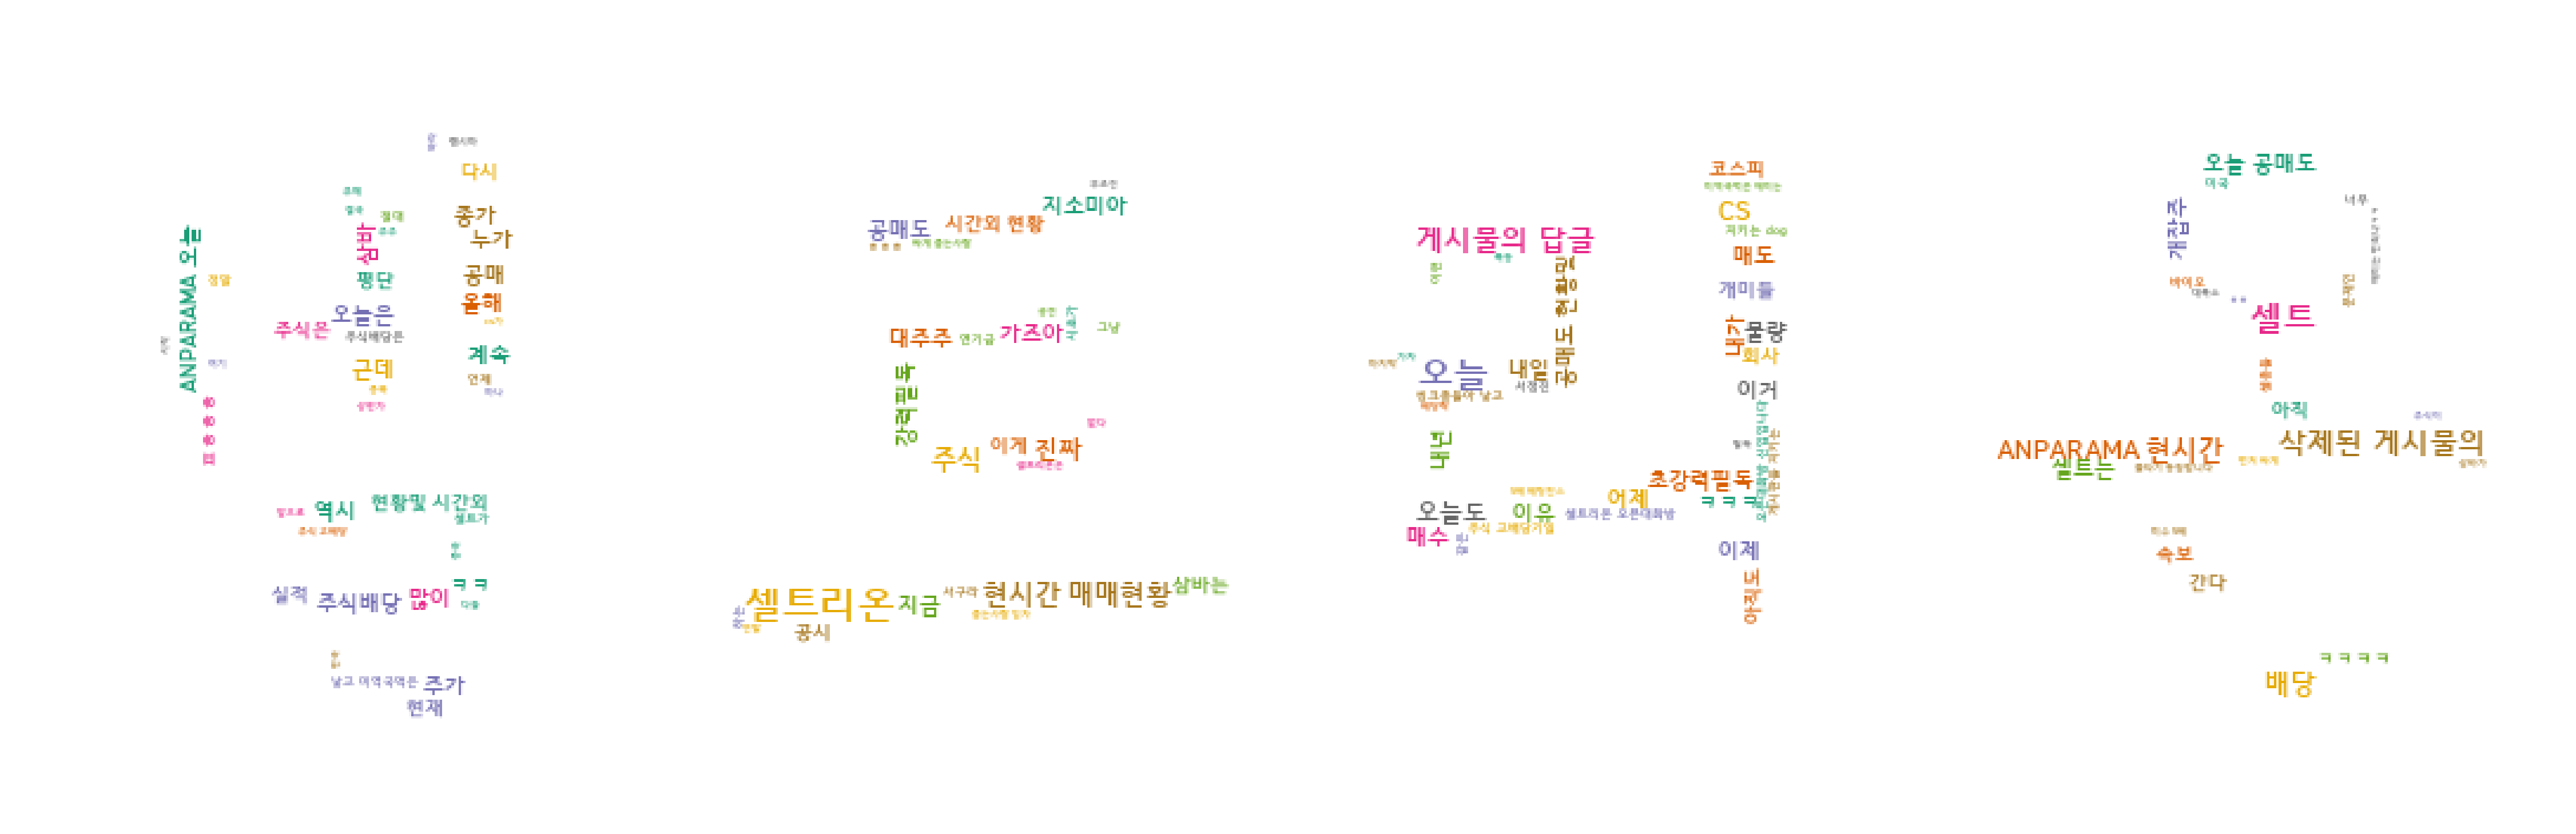

In [39]:
plt.figure(figsize = (80,30))
wc = WordCloud(font_path='C:\\Windows\\Fonts\\HANDotumB.ttf', background_color="white", colormap = "Dark2_r",
               max_words=2000, mask=mask, max_font_size=300, random_state=42)
               
wc.generate_from_text(contents)

plt.imshow(wc)
plt.axis("off")
plt.savefig('WC_셀트리온.png')

### (5) 인간지표 별 주가 그래프 그리기

In [40]:
df_test = df[['날짜', '인간지표']]
df_dummies = pd.get_dummies(df_test['인간지표'])
df_hodu = pd.concat([df_test['날짜'], df_dummies], axis = 1)
df_hodu = df_hodu.groupby('날짜').sum()

In [41]:
df_hodu.head()

,안티,중립,찬티
날짜,,,
2019.11.13,44.0,34.0,104.0
2019.11.14,52.0,26.0,130.0
2019.11.15,56.0,28.0,127.0
2019.11.16,14.0,6.0,23.0
2019.11.17,20.0,7.0,28.0


In [42]:
def daily_stock_close(stock_code):
    
    daily_close = []
    date = []
    
    url = 'https://finance.naver.com/item/frgn.nhn?code=' + stock_code
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    
    for i in range(3,len(soup.select('table.type2')[1].select('tr'))) :
        
        try :
            daily_close.append(soup.select('table.type2')[1].select('tr')[i].select('td')[1].text.replace(',' , ''))
            date.append(soup.select('table.type2')[1].select('tr')[i].select('td')[0].text)
            
        except IndexError :
            continue
        
    return date, daily_close

## 종목코드
 - 삼성전자 : 005930
 - 셀트리온 : 068270
 - 에이치엘비 : 028300
 - 젬백스 : 082270
 - 메드팩토 : 235980
 - 플리토 : 300080
 - 화신테크 : 086250

In [43]:
date, daily_close = daily_stock_close("068270")

In [44]:
df_close = pd.DataFrame({"날짜" : date, "종가" : daily_close})

In [45]:
df_close.head()

,날짜,종가
0,2019.12.30,181000
1,2019.12.27,184000
2,2019.12.26,189500
3,2019.12.24,185000
4,2019.12.23,186500


In [46]:
df = pd.merge(df_close, df_hodu, how = 'right', on = '날짜')

In [47]:
df.sort_values(['날짜'], ascending=True, inplace=True)

In [48]:
df.dropna(axis=0, inplace=True)
df.head()

,날짜,종가,안티,중립,찬티
19,2019.12.02,175500,50.0,12.0,75.0
18,2019.12.03,174500,57.0,32.0,101.0
17,2019.12.04,171000,58.0,46.0,168.0
16,2019.12.05,168500,64.0,50.0,239.0
15,2019.12.06,170000,50.0,46.0,153.0


In [53]:
df['종가'] = df['종가'].astype(int)

In [49]:
font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
print('사용가능한 TTF 폰트 개수:', len(font_list))
font_list[:10] 

사용가능한 TTF 폰트 개수: 745


['C:\\Windows\\Fonts\\verdana.ttf',
 'C:\\Windows\\Fonts\\SCRIPTBL.TTF',
 'C:\\WINDOWS\\Fonts\\GILBI___.TTF',
 'C:\\WINDOWS\\Fonts\\mvboli.ttf',
 'C:\\WINDOWS\\Fonts\\SCHLBKB.TTF',
 'C:\\Windows\\Fonts\\AGENCYB.TTF',
 'C:\\Windows\\Fonts\\segoeuisl.ttf',
 'C:\\Windows\\Fonts\\KoPubDotumLight.ttf',
 'C:\\Windows\\Fonts\\ARIALNB.TTF',
 'C:\\WINDOWS\\Fonts\\PRISTINA.TTF']

In [50]:
font_fname = 'C:\\Windows\\Fonts\\HANDotumB.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

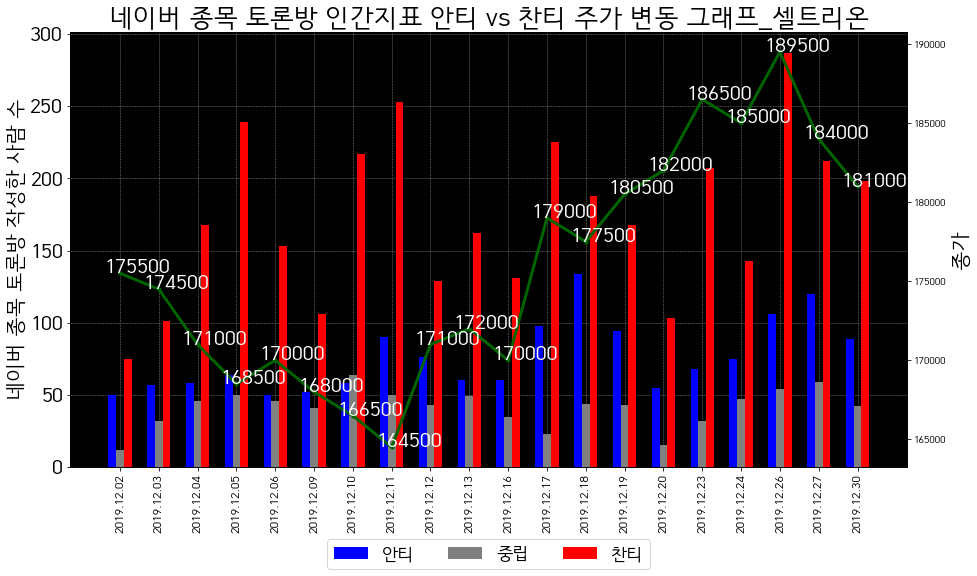

In [54]:
x = np.arange(len(df['날짜']))

fig, ax = plt.subplots(figsize=(15,8))
plt.bar(x+-0.2, df['안티'],width=0.2, label = '안티', color = 'blue')
plt.bar(x, df['중립'],width=0.2,  label = '중립', color = 'gray')
plt.bar(x+0.2, df['찬티'],width=0.2, label = '찬티', color = 'red')
plt.xticks(x, df['날짜'], fontsize='12', rotation = 90)
plt.title('네이버 종목 토론방 인간지표 안티 vs 찬티 주가 변동 그래프_셀트리온', fontsize='25')
plt.yticks(fontsize=20)
ax.set_ylabel('네이버 종목 토론방 작성한 사람 수', fontsize = '20')
ax.patch.set_facecolor('black')
ax.set_axisbelow(True)
ax.xaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
ax.legend(bbox_to_anchor=(0.5, -0.2), loc = 'center', ncol = 3, fontsize=17)


ax2 = ax.twinx()
ax2.set_ylabel('종가', fontsize = 20)
ax2.plot(df['종가'].values, linestyle='-', marker='.', linewidth=3.0, color = 'darkgreen')

for i, x in enumerate(x):
    plt.text(x-0.4, df['종가'].values[i], df['종가'].values[i], fontsize=20, color ='white')

plt.savefig('인간지표 주가 변동 그래프_셀트리온.png')
plt.show()